# Solving Traveling Theif Problem using Deep reinforcement lerning and PackIterative 



Master's thesis about Traveling thief Problem 

Author: Younes Sellimi

Tutor: Houda Derbel

University: FSEGN University Carthage

Master: Master's Degree in Business Computing

Specialization: Computer Science

In [5]:
# all libraries are imported 
import torch
from Deep_RL.Trainer import train, StateCritic, validate
import datetime
import time
import seaborn as sns
import pandas as pd
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from Deep_RL.model import DRL4TSP, Encoder
from Tensor_data.Data import TTP_dataset
from tasks import tsp
import time
import warnings
from tasks import tsp
from tasks.tsp import TSPDataset
warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [6]:
## Initilize all parameters
STATIC_SIZE_original = 3
STATIC_SIZE = 3 # (x, y)
DYNAMIC_SIZE = 1
checkpoint = ''
update_fn = None
num_nodes = 50
T = 100
seed = 12345
actor_lr = 5e-4
critic_lr = 5e-4
max_grad_norm = 2
batch_size= 128
hidden_size = 128
dropout = 0.1
num_layers = 1
# initilize the capacity as the sum of all weight items
d=torch.rand((1, 3,num_nodes))
ds=torch.sum(d[:,2])
capacity= float(ds.numpy())
# include methodes of tsp componenent
reward_fn = tsp.reward
render_fn = tsp.render
task='tsp'
train_size = 200000
valid_size = 1000
train_data = TSPDataset(num_nodes, train_size, seed, capacity)
valid_data = TSPDataset(num_nodes, valid_size, seed + 1, capacity)


# Training the Deep RL with Actor-Critic model for solving the TSP componenet of whole TTP

  Batch 99/1563, reward: 31.217, loss: -509.1005, took: 1166.0413s
  Batch 199/1563, reward: 27.322, loss: -5.5525, took: 1175.0276s
  Batch 299/1563, reward: 26.835, loss: -1.4572, took: 1157.8639s
  Batch 399/1563, reward: 26.649, loss: 0.0418, took: 1163.7888s
  Batch 499/1563, reward: 26.637, loss: 2.7956, took: 1178.2673s
  Batch 599/1563, reward: 26.522, loss: 0.8430, took: 1202.3353s
  Batch 699/1563, reward: 26.560, loss: 0.4630, took: 1177.5318s
  Batch 799/1563, reward: 26.480, loss: 0.4927, took: 1174.3747s
  Batch 899/1563, reward: 26.481, loss: -2.0053, took: 1182.5061s
  Batch 999/1563, reward: 26.418, loss: -1.4942, took: 1179.1728s
  Batch 1099/1563, reward: 26.268, loss: -2.8036, took: 1177.8731s
  Batch 1199/1563, reward: 24.262, loss: 0.0244, took: 1182.2979s
  Batch 1299/1563, reward: 22.220, loss: -3.6088, took: 1172.2723s
  Batch 1399/1563, reward: 21.651, loss: -0.7399, took: 2507.5884s
  Batch 1499/1563, reward: 21.242, loss: -0.5670, took: 1185.5507s
Mean epoch

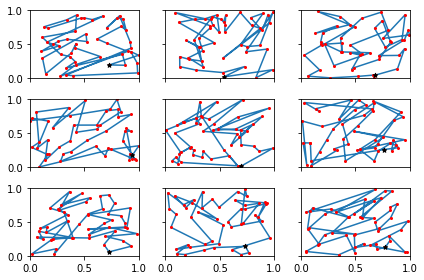

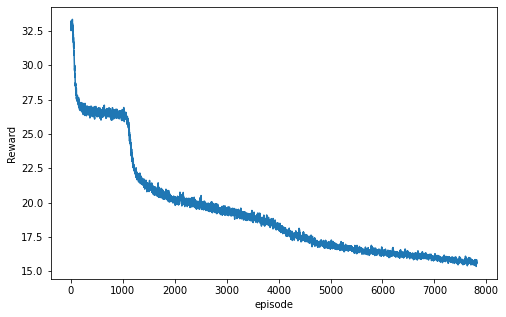

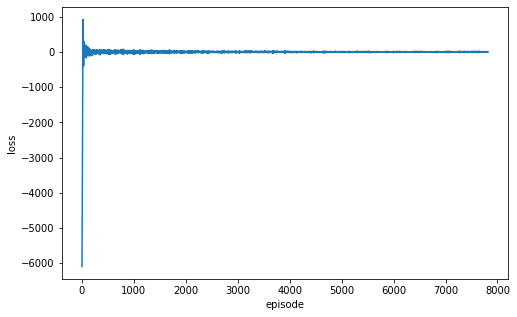

In [3]:
    import matplotlib.pyplot as plt
    %matplotlib inline

    STATIC_SIZE = 3 # (x, y)
    DYNAMIC_SIZE = 1 # dummy for compatibility
    


    update_fn = None

    actor = DRL4TSP(STATIC_SIZE,
                    DYNAMIC_SIZE,
                    hidden_size,
                    update_fn,
                    tsp.update_mask,
                    num_layers,
                    dropout).to(device)

    critic = StateCritic(STATIC_SIZE, DYNAMIC_SIZE, hidden_size).to(device)



    if checkpoint:
        path = os.path.join(checkpoint, 'actor.pt')
        actor.load_state_dict(torch.load(path, device))

        path = os.path.join(checkpoint, 'critic.pt')
        critic.load_state_dict(torch.load(path, device))

   # Traine the model use the above all parameters 
    train(actor, critic, task, num_nodes, capacity, train_data, valid_data, reward_fn, render_fn, batch_size, actor_lr, critic_lr, max_grad_norm)

# Testing the model by the test data 

In [3]:
actor = DRL4TSP(STATIC_SIZE,
                    DYNAMIC_SIZE,
                    hidden_size,
                    update_fn,
                    tsp.update_mask,
                    num_layers,
                    dropout).to(device)

critic = StateCritic(STATIC_SIZE, DYNAMIC_SIZE, hidden_size).to(device)
test_dir = 'test'
test_data = TSPDataset(num_nodes, valid_size, seed + 2, capacity)
test_loader = DataLoader(test_data, batch_size, False, num_workers=0)
out = validate(test_loader, actor, capacity, tsp.reward, tsp.render, save_dir=test_dir, num_plot=5)
print('Average tour length: ', out )


Average tour length:  26.300307273864746


In [3]:
#create an empty csv file in the folder Visualize
import csv
savefile = os.getcwd() + '/Visualize/run_all.csv'
title = ['Problem name', 'DeepRLTTP&PK']
with open(savefile, 'a', newline='') as sfile:
    writer = csv.writer(sfile)
    writer.writerow(title)

# Run 10 time each instance in the folder instances/Trivial_intances/ .. 
 After running the code, our algorithm will produce solution then will save each solution simultaneously in two csv files named like instances '_Trivial_instances_1633978274.5599.csv' and other named 'run_all.csv'   


The TTP instance called berlin52-TTP_trivialized bounded strongly corr
print the avrage traveling thief problem 308.91916572146243
total time computation 899.9434695243835
/............................................................................../
The TTP instance called berlin52-TTP_trivialized bounded strongly corr
print the avrage traveling thief problem 1520.0021755693288
total time computation 922.9487738609314
/............................................................................../
The TTP instance called berlin52-TTP_trivialized bounded strongly corr
print the avrage traveling thief problem 1293.3816870898372
total time computation 1077.9314725399017
/............................................................................../
The TTP instance called berlin52-TTP_trivialized bounded strongly corr
print the avrage traveling thief problem 1142.0690256095281
total time computation 1332.8759849071503
/..................................................................

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


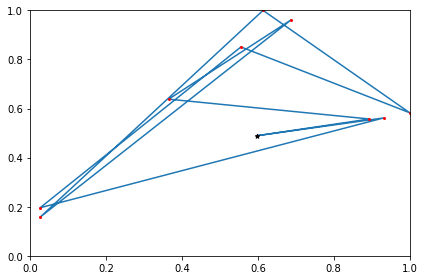

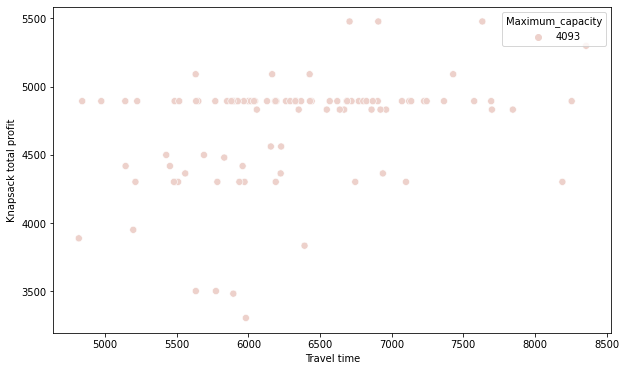

FileNotFoundError: [Errno 2] No such file or directory: 'Visualize/Trivial_instances\\Trivial_instances.png'

<Figure size 432x288 with 0 Axes>

In [4]:
# It is convenient to visualize it in matlab
from tasks.tsp import TSPDataset, reward, render
from TspandKpindependent.ObjFunction import Traveling_theif_rewards

# Import TTP instances
from Tensor_data.ReadFile import read_file
from main import main
import csv
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# "../tsp_transfer_100run_500000_5epoch_20city/20"效果一般。应该再训练一遍
save_dir = "tsp"
 
# save_dir = "../tsp_transfer/100"
# param
update_fn = None
STATIC_SIZE = 3 # (x, y)
DYNAMIC_SIZE = 1  # dummy for compatibility

# claim model
actor = DRL4TSP(STATIC_SIZE,
                DYNAMIC_SIZE,
                128,
                update_fn,
                tsp.update_mask,
                1,
                0.1).to(device)
critic = StateCritic(STATIC_SIZE, DYNAMIC_SIZE, 128).to(device)

# runing each instance 10 time 
instance='Trivial_instances'
file = os.getcwd() + '/Visualize/_%s_%2.4f.csv'%(instance, time.time())
title = ['Sol_number','Travel', 'Profit','TTP reward', 'Maximum_capacity' ]
with open(file, 'a', newline='') as sfile:
        writer = csv.writer(sfile)
        writer.writerow(title)
i=0
while i < 10:
    SubProblemTSP,TSPxy,SubProblemKP, vmax, vmin, rent_ratio, weight_limit, capacity, items, num_nodes, df_loc_bag, dataName,TypKnap = read_file('instances/Trivial_instances/trivial_0%d.ttp'%i)
    Test_data = TTP_dataset(num_nodes, SubProblemTSP, capacity)
    Test_loader = DataLoader(Test_data, 1, False, num_workers=0)
    iter_data = iter(Test_loader)
    static, dynamic, x0 = iter_data.next()
    static = static.to(device)
    dynamic = dynamic.to(device)
    x0 = x0.to(device) if len(x0) > 0 else None
    avg, runtime, dataName ,TypKnap = main(static, dynamic, x0, actor, critic, device, os, render_fn, save_dir, TSPxy, rent_ratio, weight_limit, capacity, items, num_nodes, df_loc_bag, dataName, TypKnap, file)
    print('The TTP instance called',dataName,TypKnap)
    print('print the avrage traveling thief problem', avg)
    print('total time computation', runtime)
    print('/............................................................................../')
    index='0%d'%i
    num_item='_%d'%items
    name=dataName+num_item+TypKnap+index
    data=[name, avg]
    with open(savefile, 'a', newline='') as sfile:
                writer = csv.writer(sfile)
                writer.writerows([data])
    i=i+1
run = pd.read_csv(savefile)
all_sol = pd.read_csv(file)
x=all_sol.Travel
y=all_sol.Profit
g=all_sol.Maximum_capacity

plt.figure(figsize=(10, 6))
sns.scatterplot(x,y,s=50, hue=g)
plt.ylabel('Knapsack total profit')
plt.xlabel('Travel time')
plt.show()
path = os.path.join('Visualize/%s'%instance,'%s.png'%instance )
plt.savefig(path, bbox_inches='tight', dpi=400)
print(run.head(100))  
    

# Vizialization 3D for travel time, profit ,and totale TTP reward for each solution.

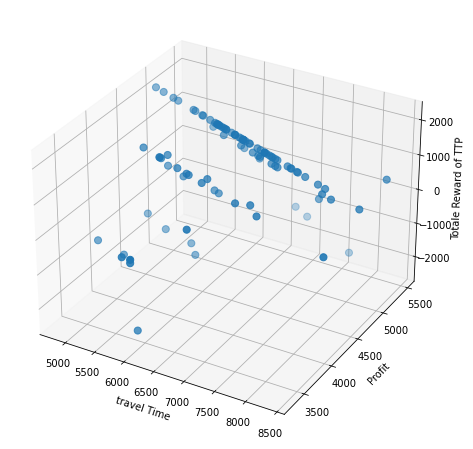

In [7]:
%matplotlib inline
#file=os.getcwd() + '/Visualize/_Trivial_instances_1633978274.5599.csv'
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(17, 8))
ax = fig.add_subplot(projection='3d')
all_sol = pd.read_csv(file)
x=all_sol.Travel
y=all_sol.Profit
z=all_sol.TTPreward

ax.scatter(x, y, z, s=50)
ax.set_xlabel('travel Time')
ax.set_ylabel('Profit')
ax.set_zlabel('Totale Reward of TTP')
plt.show()